In [1]:
import numpy as np


def log_posterior_unnorm(
    par: np.ndarray,
    obs: np.ndarray,
    y_obs: np.ndarray,
    sigma_prior: float = 1.0,
    sigma_lik: float = 1.0,
) -> np.ndarray:
    """
    Independent standard-normal prior on 'par' (each dimension),
    independent Gaussian likelihood on 'obs' vs y_obs with sigma_lik.

    Returns unnormalized log posterior for each snapshot i:
      logpi[i] = -0.5 * ||par[i]||^2 / sigma_prior^2
                 -0.5 * ||obs[i] - y_obs||^2 / sigma_lik^2
    (constants dropped; fine for MH ratios)
    """
    par = np.asarray(par, dtype=np.float64)
    obs = np.asarray(obs, dtype=np.float64)
    y_obs = np.asarray(y_obs, dtype=np.float64)
    if obs.shape[1] != y_obs.shape[0]:
        raise ValueError(f"y_obs has length {y_obs.shape[0]}, expected {obs.shape[1]}")

    lp_prior = -0.5 * np.sum((par / sigma_prior) ** 2, axis=1)
    resid = obs - y_obs[None, :]
    lp_lik = -0.5 * np.sum((resid / sigma_lik) ** 2, axis=1)
    return lp_prior + lp_lik

In [2]:
import h5py
import numpy as np

with h5py.File("data.h5", "r") as f:
    par   = f["par"][:]
    obs   = f["obs"][:]
    y_obs = f["y_obs"][:]
    logpi = f["logpi"][:]
    chain = f["chain"][:]
    props = f["props"][:]


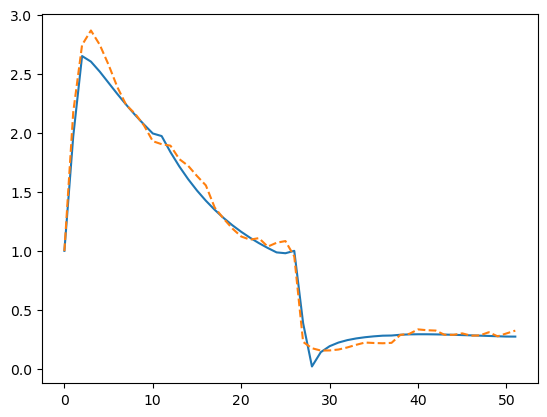

In [10]:
import matplotlib.pyplot as plt
plt.plot(obs[5000,:] )
plt.plot(y_obs[:], linestyle='dashed' )

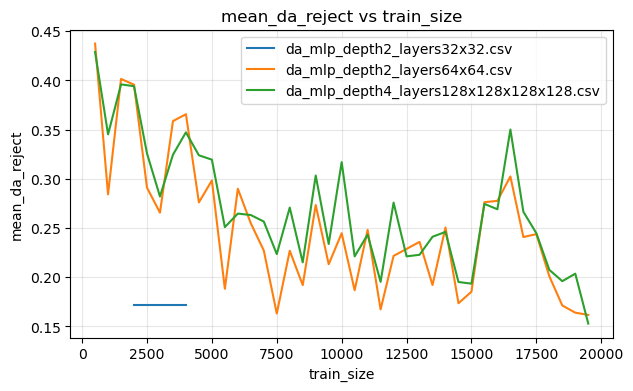

In [19]:
import pandas as pd
import glob
import os

csv_paths = sorted(glob.glob(os.path.join("results", "*.csv")))
if not csv_paths:
    raise FileNotFoundError("No CSV files found in 'results'.")

used_train_size = False
plt.figure(figsize=(7, 4))
for path in csv_paths:
    df = pd.read_csv(path)
    if "mean_da_reject" not in df.columns:
        continue
    if "train_size" in df.columns:
        x = df["train_size"]
        used_train_size = True
    else:
        x = df.index
    plt.plot(x, df["mean_da_reject"], label=os.path.basename(path))

if not used_train_size:
    raise KeyError("Column 'train_size' not found in any CSV in 'results/'.")

plt.xlabel("train_size")
plt.ylabel("mean_da_reject")
plt.title("mean_da_reject vs train_size")
plt.grid(True, alpha=0.3)
plt.legend()


In [3]:
import torch
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", DEVICE, flush=True)

Device: cuda


In [4]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.get_device_name(0))


2.9.1
13.0
NVIDIA GeForce GTX 1080 Ti


/usr/lib/python3.13/site-packages/torch/cuda/__init__.py:283: UserWarning: 
    Found GPU0 NVIDIA GeForce GTX 1080 Ti which is of cuda capability 6.1.
    Minimum and Maximum cuda capability supported by this version of PyTorch is
    (7.5) - (12.1)
    
  warnings.warn(
/usr/lib/python3.13/site-packages/torch/cuda/__init__.py:304: UserWarning: 
    Please install PyTorch with a following CUDA
    configurations:  12.6 following instructions at
    https://pytorch.org/get-started/locally/
    
  warnings.warn(matched_cuda_warn.format(matched_arches))
/usr/lib/python3.13/site-packages/torch/cuda/__init__.py:326: UserWarning: 
NVIDIA GeForce GTX 1080 Ti with CUDA capability sm_61 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_75 sm_80 sm_86 sm_87 sm_89 sm_90 sm_100 sm_103 sm_110 sm_120 sm_121.
If you want to use the NVIDIA GeForce GTX 1080 Ti GPU with PyTorch, please check the instructions at https://pytorch.org/get-star